In [1]:
import csv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import Preprocessing as pp
from scipy.io import loadmat

In [2]:
temp_data_folder = '../Data/Temp_Data/'

## Import Data and small visualisation

In [3]:
validation_values = loadmat('../Data/Raw_Data/n_soll.mat')['n_soll'][0::1000]
validation_time = loadmat('../Data/Raw_Data/t_nsoll.mat')['t_2A_ela'][0][0::1000]
df_validation = pd.DataFrame()
df_validation['time'] = validation_time
df_validation['spinning'] = validation_values

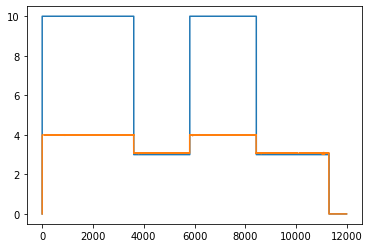

In [4]:
input_validation = pd.DataFrame()
input_validation['time'] = [0, 1, 3605, 3606, 5811, 5812, 8429, 8430, 11294, 11295, 11981]
input_validation['voltage'] = [0, 10, 10, 3, 3, 10, 10, 3, 3, 0,0]

plt.plot(input_validation['time'], input_validation['voltage'])
plt.plot(df_validation['time'], df_validation['spinning']/1000)
plt.show()

In [5]:
df_input_drehzahl = pp.openCSVFile('input_drehzahl.csv', temp_data_folder)
df_input_drehzahl

,nsoll_time,nsoll_input_voltage,nsoll_measured
0,0.00000,3.0,3092.446
1,1824.25000,3.0,3092.446
2,1824.26000,5.0,3276.050
3,3048.40000,5.0,3276.050
4,3048.41000,3.0,3092.446
5,4264.85000,3.0,3092.446
6,4264.86000,7.5,3580.525
7,5484.76000,7.5,3580.525
8,5484.77000,3.0,3092.446
9,6704.88000,3.0,3092.446


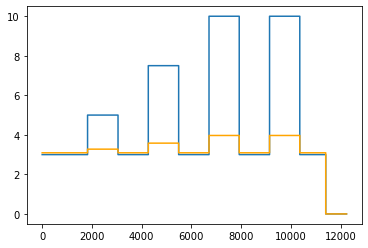

In [6]:
plt.plot(df_input_drehzahl['nsoll_time'], df_input_drehzahl['nsoll_input_voltage'])
plt.plot(df_input_drehzahl['nsoll_time'], df_input_drehzahl['nsoll_measured']/1000, 'orange')
plt.show()

## Predict spinning amount based on input

In [7]:
from sklearn import linear_model

In [8]:
reg = linear_model.BayesianRidge()
reg.fit(df_input_drehzahl[['nsoll_input_voltage']], df_input_drehzahl['nsoll_measured'])

BayesianRidge()

In [9]:
predict = reg.predict(input_validation[['voltage']])

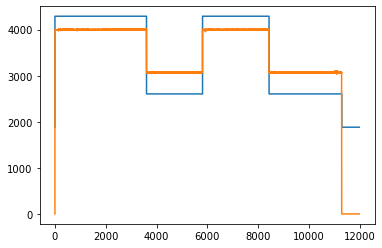

In [10]:
plt.plot(input_validation['time'], predict)
plt.plot(df_validation['time'], df_validation['spinning'])

In [ ]:
reg.score(inpu)